# IADS final exam 2023

## Theoretic part

## Question 1 (5pts).
Imagine training a model that considers multiple street segments and aims to predict the traffic based on the known characteristics of the street segments. Some of the street segments from the training sample have the observed amount of traffic specified for them, others do not. How would you classify this problem from the Machine Learning perspective?

A. Supervised learning;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:

Answer: C.

Reason: Because some of datas are labeled and others do not. And this is the definition of semi-supervised learning.

## Question 2 (5pts).
Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.03$ for $x_1$, $0.3$ for $x_2$ and $0.15$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero.

Answer:C, D

Reason: 

       (A)(B) are wrong. The p-value represents the signicance rather than the coefficient or the correlation. Therefore, we're not sure about the impact of X3 or the correlation between X2 and X3.
       
       (C) is right. When p-value is smaller than 0.05, we could reject the null-hypothesis at 95% significance level.Therefore, we could rejected the null-hypothesis a1, but not for a2 and a3.
       
       (D) is right. The smaller the p-value, the more significant the result. Because the p-value of a1 is very small, we can say that the estimated value of a1 is statistically significant.
       
       (E) is wrong. The result of a2 and a3 are not very significant, but they may have a slight impact. The statement that they should contain zero is too absolute.
       

## Question 3 (5pts).
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

B. Overfitting problem often happens when we do not have enough features but a big
number of observations.

C. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

D. Overfitting problem could happen when we have many noisy features but a
small number of observations.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

Answer: D, E

Reason:

    (A) is wrong. The R-squared only represents the degree of fitting to the training data. It cannot represent the degree of fitting to the new data.
    
    (B) is wrong, (D) is right. Overfitting problem ofter happens when we do not enough number of observations but a big number of features.
    
    (C) is wrong, (E) is right. If the in-sample R-squared is also very low, there is not overfitting problem. But if the R-squared of out-of-sample is much lower than in-sample R-squared, we can say there may be a overfitting problem.

## Question 4 (5pts).
You trained the regression model with 100 regressors and 1000 observations in the training and another 1000 in the test sample. You found that in-sample R2 over the training sample is 70\% and the out-of-sample R2 over the test sample only - 30\%.

a) Do you think there is any problem and how would you characterize it? Can adding more regressors (if you have them) help the model?

b) Which approaches you may use to solve the problem?

c) Would you expect the in-sample R2 to increase or decrease after that applying suggested approaches from step b)? What about the out-of-sample (test) R2?

(a) There may be a overfitting problem. One of the characteristics of the overfitting problem is that there are huge difference between the R-square of in-sample and outsample data. 
    I don't think more regressors will help the model. It is because one of the reasons of overfitting problem is that we have too much regressors and few data. So adding more regressors may worsen the model.
    
(b) Add more training data.
    Reduce some unimportant model.
    Use Ridge regression or Lasso regressionApply to conduct regularization.
    Use Cross-Validation to assess the model.
    
(c) I hope the in-sample R2 decrease and the out-of-sample R2 increase.

In [1]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import mapclassify
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Traffic Modeling for Real-Time Autonomous Vehicle Solutions in LGA

Transportation network models are essential to transportation operations and planning. A simple yet well-designed linear model can provide us insights into the traffic demand. We are going to model the outgoing traffic around LGA, one of the busiest transportation hubs in NYC.
In this test, you'll be asked to:
* Find possible correlations from observations
* Incorporate time patterns using dummy variables
* Run and diagnose linear models, in-sample and out-of-sample. Perform feature selection
* Cluster the days based on their ridership patterns to see if we can detect any outliers

We will be importing the dataset `LGAVehicleByHour.csv`,`LGAFlightArrival` providing FHV and taxi ridership and arrivals at the airport aggregated on the hourly basis:
* `vehicle_count`: Number of FHV (For Hire Vehicle) and taxi departing from LGA. This is our target variable.
* `arrivals`: Number of incoming domestic flights arriving LGA, which is assumed to provide a basis for future FHV and taxi demand

In [2]:
# import and curate the dataset
TaxiRidership = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAVehicleByHour.csv")
FlightArrival = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAFlightArrival.csv")

In [3]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count
0,1,2018-01-01 00:00,0.0
1,2,2018-01-01 00:00,0.0
2,3,2018-01-01 00:00,0.0
3,4,2018-01-01 00:00,0.0
4,5,2018-01-01 00:00,0.0


In [4]:
FlightArrival.head()

,Date,arrivals
0,18/1/1 0:00,3
1,18/1/1 1:00,0
2,18/1/1 2:00,1
3,18/1/1 3:00,0
4,18/1/1 4:00,0


In [5]:
# convert the `date` feature into `dt.datetime` format. This is for later creating dummy variables
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)
FlightArrival.Date = pd.to_datetime(FlightArrival.Date, format='%y/%m/%d %H:%M')

In [6]:
#get day of the week; monday - 0, sunday - 6
TaxiRidership['DOW']=pd.DatetimeIndex(TaxiRidership.Date).weekday

In [7]:
#get day from beginning of the year, hour and day of the week from datetime
TaxiRidership['Hour']=pd.DatetimeIndex(TaxiRidership.Date).hour

In [8]:
#get day from beginning of the year
TaxiRidership['day']=((TaxiRidership.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)

## Task 1. Spatial visualization (10pts)

### Q1. Spatial distribution of total ridership from LGA on each day of week. Using colormap 'RdBu_r', bonus on if you plot 7 plots on the same colormap scale (+3pts).
Note: Figure's readability will also be considered when grading. Please always include necessary parts such as labels and legends.

In [9]:
# Read the GeoJSON file and merge the two dataframes
file_path = 'taxizone.geojson'
taxizone = gpd.read_file(file_path)
taxizone['location_id'] = taxizone['location_id'].astype('int64')

In [10]:
TaxiRidership1 =TaxiRidership.groupby(['DOW', 'DOLocationID'])['vehicle_count'].sum().reset_index()
TaxiRidership1.head()

,DOW,DOLocationID,vehicle_count
0,0,1,1049.0
1,0,2,0.0
2,0,3,462.0
3,0,4,2411.0
4,0,5,18.0


In [11]:
TaxiRidership_Viz = taxizone.merge(TaxiRidership1, left_on='location_id', right_on='DOLocationID')
TaxiRidership_Viz.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,DOW,DOLocationID,vehicle_count
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0,1,1049.0
1,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",1,1,1020.0
2,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",2,1,969.0
3,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",3,1,1009.0
4,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",4,1,1294.0


In [12]:
vmin = TaxiRidership_Viz['vehicle_count'].min()
vmax = TaxiRidership_Viz['vehicle_count'].max()
print(vmin,vmax)

0.0 48129.0


In [13]:
bins = [0, 56,207, 369, 545, 799, 1171, 2982, 4691,8070, 48129]

Text(29.25739020056615, 0.5, 'Longitude')

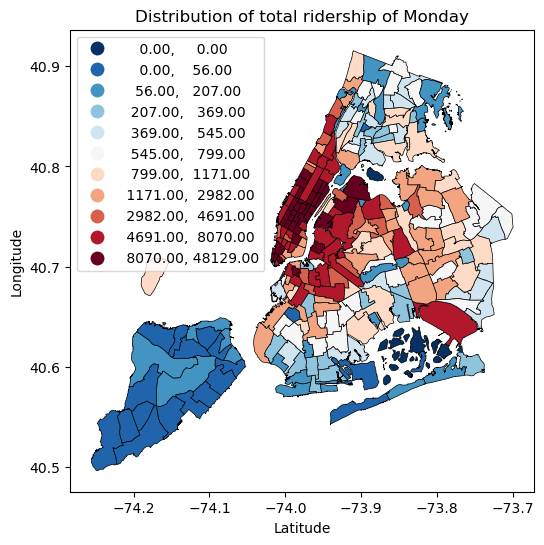

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
Monday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==0]
quantiles = mapclassify.UserDefined(Monday['vehicle_count'], bins=bins)
Monday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Monday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(29.25739020056615, 0.5, 'Longitude')

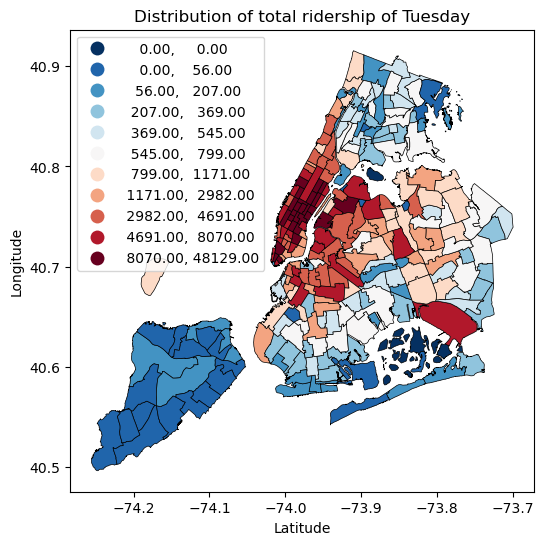

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
Tuesday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==1]
quantiles = mapclassify.UserDefined(Tuesday['vehicle_count'], bins=bins)
Tuesday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Tuesday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(29.25739020056615, 0.5, 'Longitude')

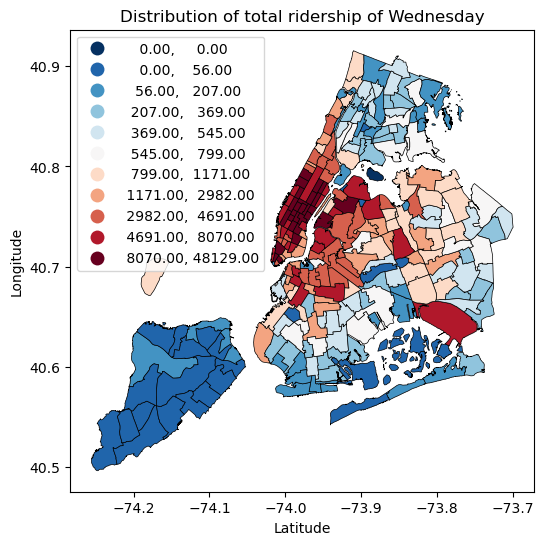

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
Wednesday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==2]
quantiles = mapclassify.UserDefined(Wednesday['vehicle_count'], bins=bins)
Wednesday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Wednesday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(29.25739020056615, 0.5, 'Longitude')

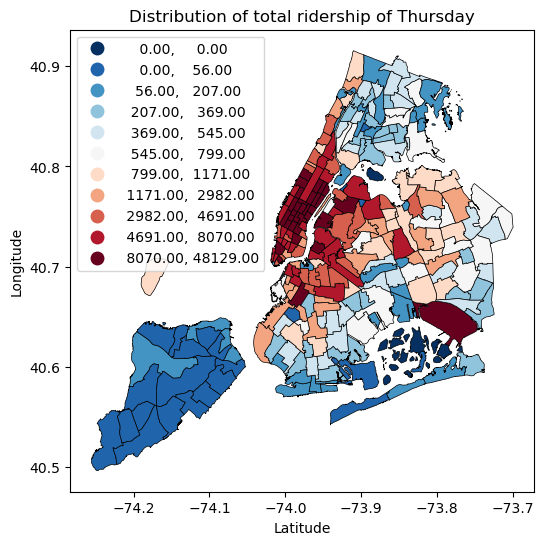

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
Thursday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==3]
quantiles = mapclassify.UserDefined(Thursday['vehicle_count'], bins=bins)
Thursday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Thursday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(29.25739020056615, 0.5, 'Longitude')

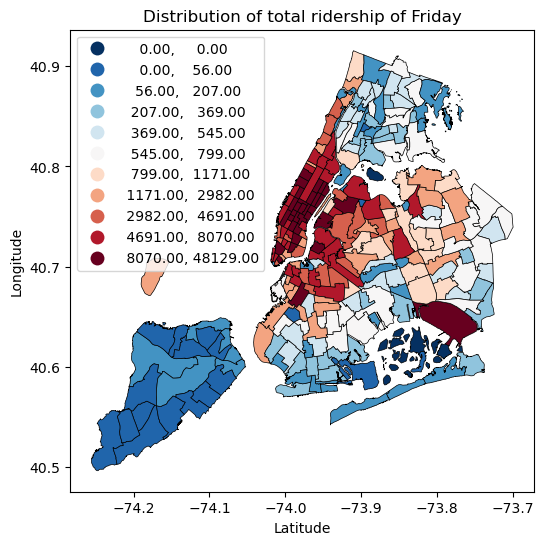

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
Friday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==4]
quantiles = mapclassify.UserDefined(Friday['vehicle_count'], bins=bins)
Friday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Friday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(29.25739020056615, 0.5, 'Longitude')

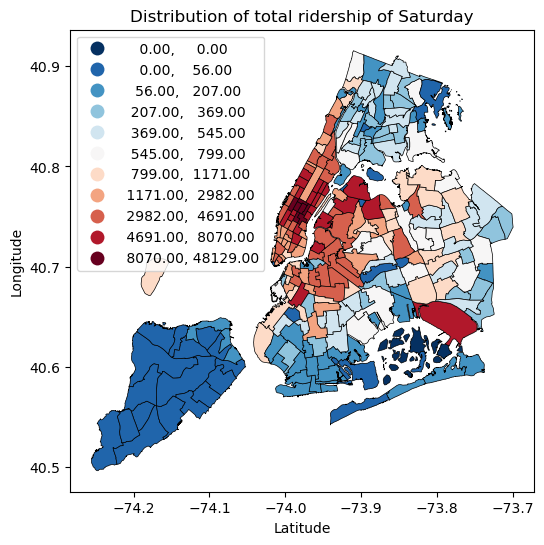

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
Saturday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==5]
quantiles = mapclassify.UserDefined(Saturday['vehicle_count'], bins=bins)
Saturday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Saturday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(29.25739020056615, 0.5, 'Longitude')

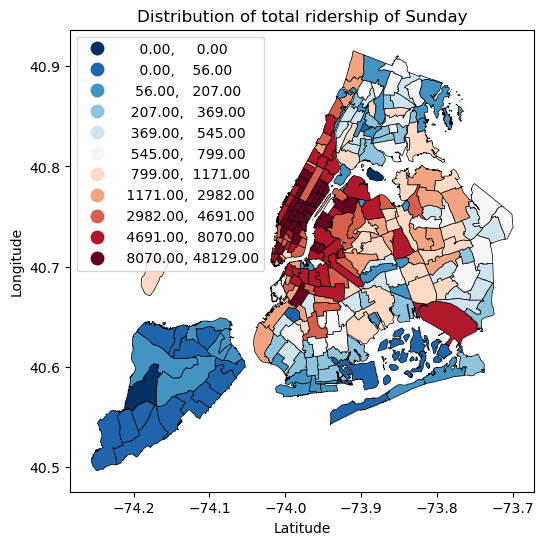

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
Sunday=TaxiRidership_Viz[TaxiRidership_Viz['DOW']==6]
quantiles = mapclassify.UserDefined(Sunday['vehicle_count'], bins=bins)
Sunday.plot(column='vehicle_count', ax=ax, edgecolor='k', linewidth=0.5, legend=True, 
             legend_kwds={'loc': 'upper left'}, cmap='RdBu_r', scheme='UserDefined', classification_kwds=dict(bins=bins))
plt.title("Distribution of total ridership of Sunday")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

## Task 2: Data preprocessing (10pts)

### Q1. aggregate ridership to date-hour level (over the entire city for all the drop off locations aggregated together), merge with the flight arrival data (5pts)
Note: date-hour level means that you have to find the count for every hour of the day for each day.
Hint: you may need to precess data format in two datasets before merge.

In [21]:
# example of taxi ridership date-hour level aggregation output

In [22]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01,0.0,0,0,0
1,2,2018-01-01,0.0,0,0,0
2,3,2018-01-01,0.0,0,0,0
3,4,2018-01-01,0.0,0,0,0
4,5,2018-01-01,0.0,0,0,0


In [23]:
TaxiRidership =TaxiRidership.groupby(['Date','Hour'])['vehicle_count'].sum().reset_index()
TaxiRidership.head()

,Date,Hour,vehicle_count
0,2018-01-01 00:00:00,0,142.0
1,2018-01-01 01:00:00,1,23.0
2,2018-01-01 02:00:00,2,2.0
3,2018-01-01 03:00:00,3,1.0
4,2018-01-01 04:00:00,4,13.0


In [24]:
FlightArrival.Date = pd.to_datetime(FlightArrival.Date)
FlightArrival['Hour'] = pd.to_datetime(FlightArrival['Date']).dt.hour
FlightArrival =FlightArrival.groupby(['Date', 'Hour'])['arrivals'].sum().reset_index()
FlightArrival.head()

,Date,Hour,arrivals
0,2018-01-01 00:00:00,0,3
1,2018-01-01 01:00:00,1,0
2,2018-01-01 02:00:00,2,1
3,2018-01-01 03:00:00,3,0
4,2018-01-01 04:00:00,4,0


In [25]:
FlightArrival['Date'] = pd.to_datetime(FlightArrival['Date'])
TaxiRidership['Date'] = pd.to_datetime(TaxiRidership['Date'])

# Merge on 'Hour' and 'Date'
merge_taxi_flight = pd.merge(FlightArrival, TaxiRidership, on=['Hour', 'Date'])

# Additional processing if needed
merge_taxi_flight['DOW'] = pd.DatetimeIndex(merge_taxi_flight['Date']).weekday
merge_taxi_flight['Day'] = ((merge_taxi_flight['Date'] - dt.datetime(2018, 1, 1)) / dt.timedelta(days=1)).astype(int)

# Display the merged DataFrame
merge_taxi_flight.head()

,Date,Hour,arrivals,vehicle_count,DOW,Day
0,2018-01-01 00:00:00,0,3,142.0,0,0
1,2018-01-01 01:00:00,1,0,23.0,0,0
2,2018-01-01 02:00:00,2,1,2.0,0,0
3,2018-01-01 03:00:00,3,0,1.0,0,0
4,2018-01-01 04:00:00,4,0,13.0,0,0


### Q2. add time-lagged arrivals (1,2,3,4,5,6..12 hours before) - 5pts

Taxi and FHV ridership volume is impacted by flight arrivals. Intuitively, more flights bring more passengers, and more ridership eventually. However, the hourly ridership volume may not only be related to flight arrivals in the same hour, arrivals 1 hour, 2 hours ago could impact ridership as well, as travelers need some time to pass the customs or wait for luggage. Please add lag of `arrivals` as additional features, and name new features as `lag1` for `arrivals` 1 hour ago, and `lag2` for 2 hours before and so on. You may use the `shift` function in pandas to add arrivals lag values. For example, df['arrivals'].shift(1) means adding 1 hour lag value of arrivals. `iloc` function works as well.

In [26]:
# example of dataset after added 12 lag arrivals features
#dataset.iloc[:20]

In [27]:
lags = 12
merge_taix_flight= merge_taxi_flight.assign(**{f'lag{i}': merge_taxi_flight['arrivals'].shift(i) for i in range(1, lags + 1)})
merge_taix_flight.head()

,Date,Hour,arrivals,vehicle_count,DOW,Day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
0,2018-01-01 00:00:00,0,3,142.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,1,0,23.0,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 02:00:00,2,1,2.0,0,0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 03:00:00,3,0,1.0,0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 04:00:00,4,0,13.0,0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 3. Data Exploration (20pts)

### Q1 (5pts). Print some dataset characteristics: number of records, the total number of FHV and taxi trips, total number of arriving flights


In [28]:
# number of records
merge_taix_flight.shape[0]

8760

In [29]:
# total number of FHV and taix trips
merge_taix_flight['vehicle_count'].sum()

5430922.0

In [30]:
# total number of arriving flights
merge_taix_flight['arrivals'].sum()

163713

### Q2 (10pts). Plot a probability distribution function of hourly ridership volume on weekdays and weekend using standardized data, and apply t-test to check whether there is a significant difference of hourly ridership between each day of week and the rest of the days, $\alpha=0.05$ Report hypothesis testing result in a $7\times1$ table, index name should be day of week (e.g. Monday), values should be True or False (True for P < 0.05).
Hint: You may use norm.pdf function in scipy.stats to calculate the probability distribution, and standardize at first.

In [31]:
merge_taix_flight.head()

,Date,Hour,arrivals,vehicle_count,DOW,Day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
0,2018-01-01 00:00:00,0,3,142.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,1,0,23.0,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 02:00:00,2,1,2.0,0,0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 03:00:00,3,0,1.0,0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 04:00:00,4,0,13.0,0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
vehicle_count_Sta=merge_taix_flight[['vehicle_count']]
scaler = StandardScaler()
vehicle_count_Sta = scaler.fit_transform(vehicle_count_Sta)
merge_taix_flight['vehicle_count_Sta'] = vehicle_count_Sta

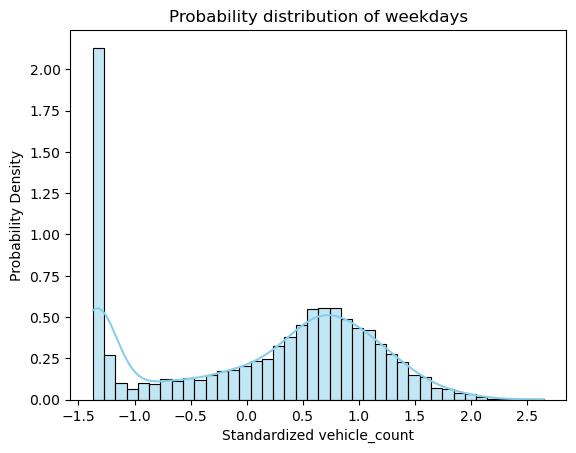

In [33]:
# Probability distribution function of weekdays 
Weekday = merge_taix_flight.loc[merge_taix_flight['DOW']<=4]
sns.histplot(Weekday['vehicle_count_Sta'], bins=40, kde=True, stat="density", color="skyblue")
plt.title("Probability distribution of weekdays")
plt.xlabel('Standardized vehicle_count')
plt.ylabel('Probability Density')
plt.show()

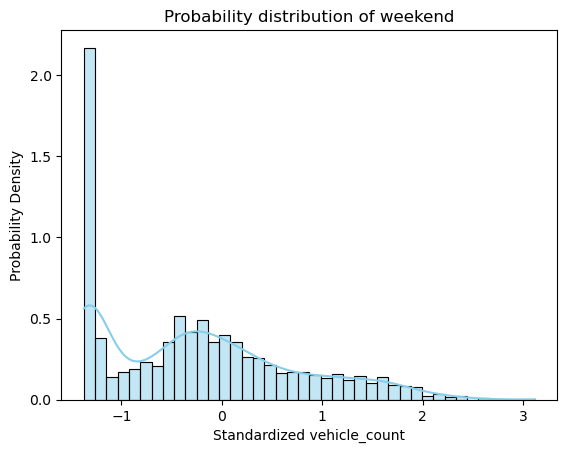

In [34]:
# Probability distribution function of weekdays 
weekend = merge_taix_flight.loc[merge_taix_flight['DOW']>4]
sns.histplot(weekend['vehicle_count_Sta'], bins=40, kde=True, stat="density", color="skyblue")
plt.title("Probability distribution of weekend")
plt.xlabel('Standardized vehicle_count')
plt.ylabel('Probability Density')
plt.show()

In [35]:
# Testing result
t_test_results = pd.DataFrame(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                               columns=['Significant Difference'])


for i in range(7):
    Day_of_week = merge_taix_flight.loc[merge_taix_flight['DOW'] == i, 'vehicle_count_Sta']
    Other_days = merge_taix_flight.loc[merge_taix_flight['DOW'] != i, 'vehicle_count_Sta']
    t_statistic, p_value = stats.ttest_ind(Day_of_week, Other_days)
    t_test_results.loc[t_test_results.index[i], 'Significant Difference'] = p_value < 0.05
t_test_results = t_test_results.T
t_test_results

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Significant Difference,True,False,False,True,True,True,False


### Q3(5pts).  Plot the timeline of the `vehicle_count` and `arrivals` for the month having the highest taxi ridership (the sum of vehicle count in the whole month). As `arrivals` and `vehicle_count` have different scales, standardize each dataset first.

In [36]:
# standardize 'arrivals' first ('vehicle_count' has already been standardized in task2 Q2)

arrivals_Sta=merge_taix_flight[['arrivals']]
scaler = StandardScaler()
arrivals_Sta = scaler.fit_transform(arrivals_Sta)
merge_taix_flight['arrivals_Sta'] = arrivals_Sta
merge_taix_flight.head()

,Date,Hour,arrivals,vehicle_count,DOW,Day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,vehicle_count_Sta,arrivals_Sta
0,2018-01-01 00:00:00,0,3,142.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.057812,-1.176818
1,2018-01-01 01:00:00,1,0,23.0,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.321176,-1.401849
2,2018-01-01 02:00:00,2,1,2.0,0,0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.367652,-1.326839
3,2018-01-01 03:00:00,3,0,1.0,0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.369865,-1.401849
4,2018-01-01 04:00:00,4,0,13.0,0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.343307,-1.401849


In [37]:
# get the month of per record
merge_taix_flight['Month'] = merge_taix_flight['Date'].dt.month

In [38]:
# get the sum of vehicle count in the whole month
merge_taix_flight_month =merge_taix_flight.groupby(['Month'])['vehicle_count'].sum().reset_index()
merge_taix_flight_month.head()

,Month,vehicle_count
0,1,383576.0
1,2,368534.0
2,3,419679.0
3,4,455743.0
4,5,497572.0


In [39]:
# find the month having the highest taxi ridership
Month = merge_taix_flight_month.loc[merge_taix_flight_month['vehicle_count'].idxmax(), 'Month']
Month

10

In [40]:
# Get the data of Oct and merge the date+hour
merge_taix_flight_Oct=merge_taix_flight.loc[merge_taix_flight['Month']==10]

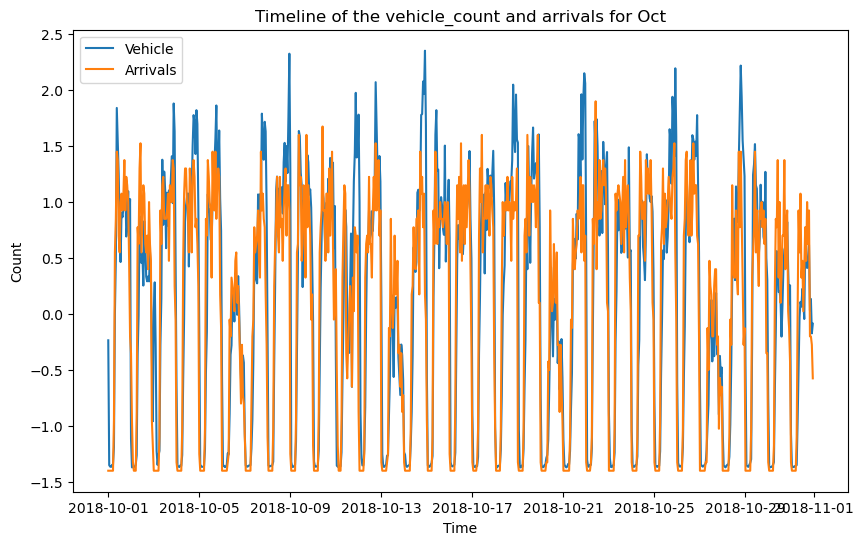

In [41]:
#  Plot the timeline of the vehicle_count and arrivals (Unit: day)
plt.figure(figsize=(10, 6))
plt.plot(merge_taix_flight_Oct['Date'], merge_taix_flight_Oct['vehicle_count_Sta'], label='Vehicle', linestyle='-')
plt.plot(merge_taix_flight_Oct['Date'], merge_taix_flight_Oct['arrivals_Sta'], label='Arrivals', linestyle='-')
plt.title('Timeline of the vehicle_count and arrivals for Oct')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

## Task 4: Build Linear Regression Model of FHV and taxi ridership vs Arrivals data (35pts - 5pts each except of Q5 - 10 pts)

### Q1. split the data into training, validation and test samples (first 90 days for training, next 180 for validation, last 90 for test)


In [42]:
training_set=merge_taix_flight.iloc[:90*24]
validation_set=merge_taix_flight.iloc[90*24:270*24]
test_set=merge_taix_flight.iloc[270*24:360*24]

### Q2.  Build an OLS model

Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using `arrivals` as a sole predictor for `vehicle_count`. Check p-value for `arrivals`. What does it indicate? Report the 99% confidence interval for arrivals's coefficient. Scatter plot for ridership and flight arrival, include the predictive line.

In [43]:
lm_Q2 = smf.ols('vehicle_count~arrivals', data=training_set).fit()
print(lm_Q2.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5657.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:53:42   Log-Likelihood:                -14690.
No. Observations:                2160   AIC:                         2.938e+04
Df Residuals:                    2158   BIC:                         2.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.8315      7.772      9.757      0.0

The p-value is too small, meaning that the result is significant.

In [44]:
# Report the 99% confidence interval for arrivals's coefficient
conf_interval = lm_Q2.conf_int(alpha=0.01)
conf_interval

,0,1
Intercept,55.794760,95.868142
arrivals,25.382394,27.184322


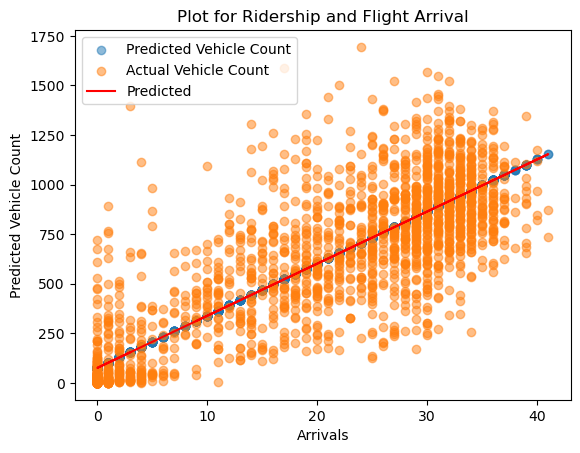

In [45]:
# Scatter plot for ridership and flight arrival, include the predictive line.

predicted_vehicle_count = lm_Q2.predict()
plt.scatter(training_set['arrivals'], predicted_vehicle_count, alpha=0.5, label='Predicted Vehicle Count')
plt.scatter(training_set['arrivals'],training_set['vehicle_count'], label='Actual Vehicle Count', alpha=0.5)
plt.plot(training_set['arrivals'], predicted_vehicle_count, color='red', label='Predicted')
plt.title('Plot for Ridership and Flight Arrival')
plt.xlabel('Arrivals')
plt.ylabel('Predicted Vehicle Count')
plt.legend()
plt.show()

### Q3. Consider Impact of immediate history of arrivals
by adding time lags - add all 12 lag variables into the regression above

There is always some delay between passengers arrival and departure (e.g. passing customs, picking up luggage, etc). `vehicle_count` might be more related to historical values of flight arrivals (lag) rather than immediate `arrivals`. Engineer a formula with all the following variables and run the regression:
* arrival, lag1, ..., lagN: that happens 1hr, ..., N=12 hr ahead.
Which of the variables have a statistically significant impact according to p-values?

In [46]:
#use this operator to generate the regression formulae
' + '.join(training_set.columns[6:18])

'lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7 + lag8 + lag9 + lag10 + lag11 + lag12'

In [47]:
lm_Q3 = smf.ols(formula = 'vehicle_count ~   arrivals+' + '+'.join(training_set.columns[6:18]), data = training_set).fit()
print(lm_Q3.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:53:42   Log-Likelihood:                -13884.
No. Observations:                2148   AIC:                         2.780e+04
Df Residuals:                    2134   BIC:                         2.788e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.5959      9.574     -5.598      0.0

I think lag1 and lag2 have a statistically significant impact according to p-values.

### Q4: Incorporate Temporal Patterns

adding categorical variables for day of week and hour of the day.

From the visualization in task1Q3, you may see that both - taxi ridership as well as arrivals follow a somewhat periodic temporal pattern. Intuitively, this is true for most traffic flows following daily rhythms including rush hours, and also varying over the course of the week. Usually, we add dummy/categorical variables (Boolean variable: 1 for True and 0 for False) to encapsulate people's traveling patterns during different time periods.

Note that it would not make sense to add hour and dow as regular regressors as we can't anticipate their linear numeric impact. Instead, the expression `C(.)` or `pd.get_dummies` could be used in the regression formulae in order to treat those variables as categorical adding corresponding dummy variables to account for their possible discrete values.

Perform the regression of `vehicle_count` ridership against `arrivals`, lags, and temporal categorical variables.

In [48]:
' + '.join(training_set.columns[6:18])

'lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7 + lag8 + lag9 + lag10 + lag11 + lag12'

In [49]:
lm_Q4 = smf.ols(formula='vehicle_count ~ arrivals + C(DOW) + C(Hour) + ' + ' + '.join(training_set.columns[6:18]), data=training_set).fit()
print(lm_Q4.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:53:42   Log-Likelihood:                -13522.
No. Observations:                2148   AIC:                         2.713e+04
Df Residuals:                    2105   BIC:                         2.737e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        64.9590     23.656      2.746

### Q5. Perform feature selection for lag variables (10pts)
As you may see not all the lag variables have a statistically significant impact on the regression. Maybe some of them are not really relevant?
Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for training the above regression over the training sample, report and plot the out-of-sample R2 over the validation sample as the function of m and pick the m which maximizes it. Evaluate the final regression over the test sample.

In [50]:
TrainR2 = [0] * 13
ValidR2 = [0] * 13
lm = [0] * 13

for M in range(0, 13):
    if M == 0:
        formula1 = f'vehicle_count ~ arrivals + C(DOW) + C(Hour)'
        lm[M] = smf.ols(formula=formula1, data=training_set).fit()
        validation_set_copy = validation_set.copy()  # Create a copy of the DataFrame
        validation_set_copy['ypred'] = lm[M].predict(validation_set_copy)
        ValidR2[M] = 1 - ((validation_set_copy.ypred - validation_set_copy.vehicle_count) ** 2).sum() / (
                (validation_set_copy.vehicle_count - validation_set_copy.vehicle_count.mean()) ** 2).sum()
        TrainR2[M] = lm[M].rsquared

    if M != 0:
        lag_columns = [f'lag{i}' for i in range(1, M + 1)]
        formula2 = 'vehicle_count ~ arrivals + C(DOW) + C(Hour)+' + ' + '.join(lag_columns)
        lm[M] = smf.ols(formula=formula2, data=training_set).fit()
        validation_set_copy = validation_set.copy()  # Create a copy of the DataFrame
        validation_set_copy['ypred'] = lm[M].predict(validation_set_copy)
        ValidR2[M] = 1 - ((validation_set_copy.ypred - validation_set_copy.vehicle_count) ** 2).sum() / (
                (validation_set_copy.vehicle_count - validation_set_copy.vehicle_count.mean()) ** 2).sum()
        TrainR2[M] = lm[M].rsquared

# Print or use TrainR2 and ValidR2 as needed
ValidR2

[0.8239650449897471,
 0.854220812866698,
 0.8559351583608437,
 0.8550756045368698,
 0.8550388226709553,
 0.8548442256450473,
 0.8548414145273984,
 0.8549355168196561,
 0.8551711672410693,
 0.8558485632418451,
 0.8555049799066015,
 0.855644510414889,
 0.8554947166392535]

When lag=2, the R2 of out of sample is the biggest.

In [51]:
lm_Q5_2 = smf.ols(formula='vehicle_count ~ arrivals + C(DOW) + C(Hour) + ' + ' + '.join(training_set.columns[6:8]), data=test_set).fit()
print(lm_Q5_2.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     523.8
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:53:43   Log-Likelihood:                -14079.
No. Observations:                2160   AIC:                         2.822e+04
Df Residuals:                    2127   BIC:                         2.841e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7918     25.609      0.148

### Q6. Visualize temporal patterns and lag impacts through bar plots
For the best regression above visualize:
- bar plot of hour vs its impact (slope coefficient)
- bar plot of day of the week vs its impact coefficient
- bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)

In [52]:
lm2 = smf.ols(formula='vehicle_count ~ arrivals + C(DOW) + C(Hour) + ' + ' + '.join(training_set.columns[6:8]), data=training_set).fit()

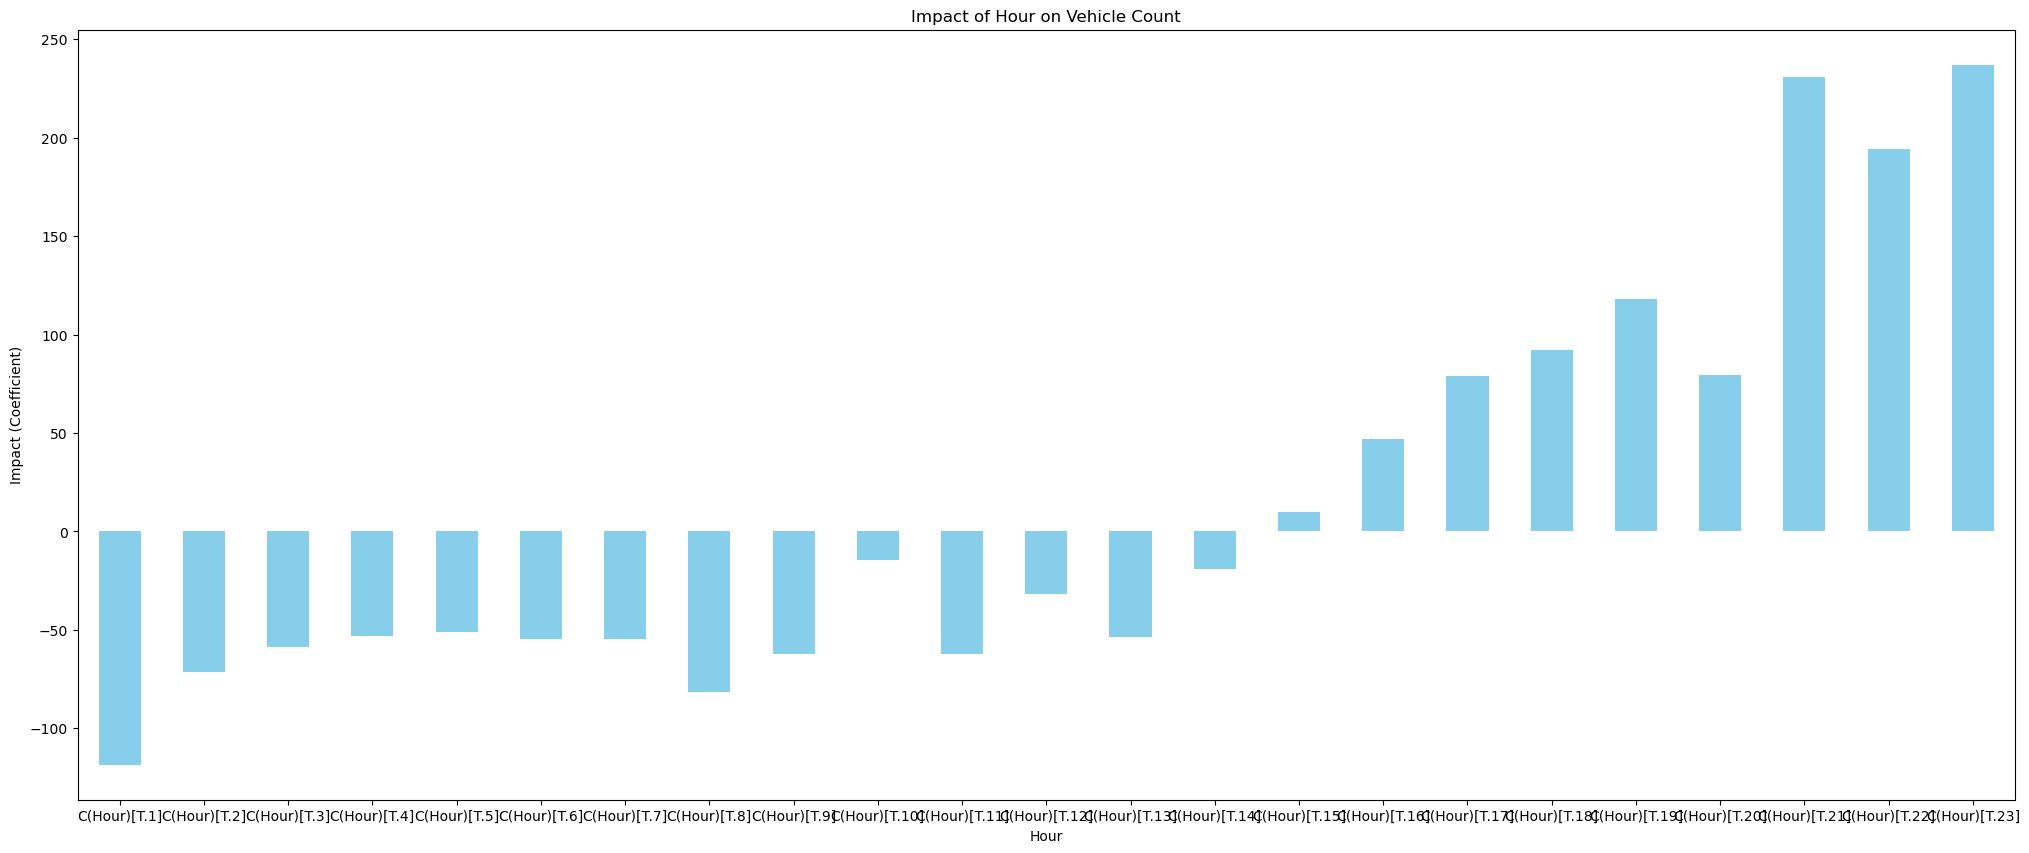

In [53]:
#bar plot of hour vs its impact (slope coefficient)
hour_coefficients = lm2.params.filter(like='C(Hour)')
plt.figure(figsize=(25, 10))
hour_coefficients.plot(kind='bar', color='skyblue')
plt.title('Impact of Hour on Vehicle Count')
plt.xlabel('Hour')
plt.ylabel('Impact (Coefficient)')
plt.xticks(rotation=0)
plt.show()

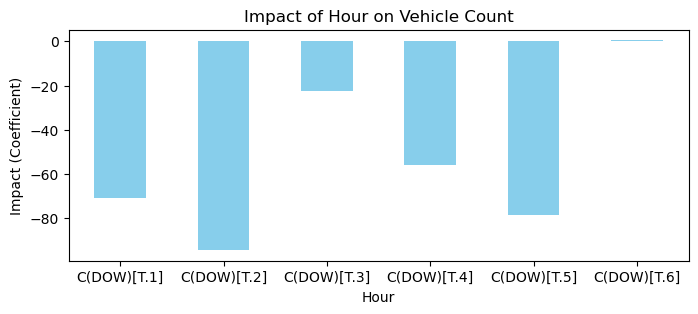

In [54]:
# bar plot of day of the week vs its impact coefficient
hour_coefficients = lm2.params.filter(like='C(DOW)')
plt.figure(figsize=(8,3))
hour_coefficients.plot(kind='bar', color='skyblue')
plt.title('Impact of Hour on Vehicle Count')
plt.xlabel('Hour')
plt.ylabel('Impact (Coefficient)')
plt.xticks(rotation=0)
plt.show()

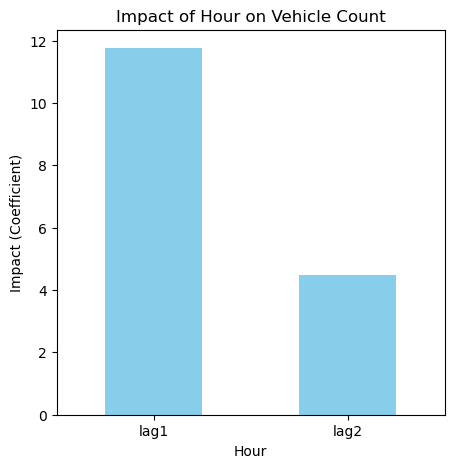

In [55]:
# bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)
hour_coefficients = lm2.params.filter(like='lag')
plt.figure(figsize=(5, 5))
hour_coefficients.plot(kind='bar', color='skyblue')
plt.title('Impact of Hour on Vehicle Count')
plt.xlabel('Hour')
plt.ylabel('Impact (Coefficient)')
plt.xticks(rotation=0)
plt.show()

## Task 5. Cluster the days of the year based on the relative timeline of their FHV and taxi departures from the airport (25pts - 5 pts each)

### Q1 (5pts). From the entire `dataset`, create a dataframe with days as rows, hours as columns and a) FHV, b)taxi departures for each hour as values (feel free to use pd.pivot_table). Normalize each row by the total daily ridership. Merge tables a) and b) horizontally

In [56]:
# We cannot devide FHV and taxi, so we just use "vehicle_count"
merge_taix_flight['Days']=((merge_taix_flight.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)
merge_taix_flight.head()

,Date,Hour,arrivals,vehicle_count,DOW,Day,lag1,lag2,lag3,lag4,...,lag7,lag8,lag9,lag10,lag11,lag12,vehicle_count_Sta,arrivals_Sta,Month,Days
0,2018-01-01 00:00:00,0,3,142.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.057812,-1.176818,1,0
1,2018-01-01 01:00:00,1,0,23.0,0,0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.321176,-1.401849,1,0
2,2018-01-01 02:00:00,2,1,2.0,0,0,0.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.367652,-1.326839,1,0
3,2018-01-01 03:00:00,3,0,1.0,0,0,1.0,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.369865,-1.401849,1,0
4,2018-01-01 04:00:00,4,0,13.0,0,0,0.0,1.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.343307,-1.401849,1,0


In [57]:
vehicle_count_days_hour = pd.pivot_table(merge_taix_flight, values='vehicle_count', index='Days', columns='Hour', aggfunc='sum')
vehicle_count_days_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Days,,,,,,,,,,,,,,,,,,,,,
0,142.0,23.0,2.0,1.0,13.0,13.0,15.0,46.0,248.0,443.0,...,765.0,865.0,776.0,1182.0,804.0,765.0,744.0,1025.0,1196.0,1079.0
1,791.0,50.0,28.0,2.0,5.0,16.0,24.0,301.0,550.0,1117.0,...,892.0,650.0,820.0,927.0,979.0,940.0,811.0,1048.0,1034.0,735.0
2,674.0,309.0,24.0,3.0,8.0,12.0,44.0,176.0,531.0,777.0,...,700.0,688.0,907.0,1011.0,871.0,713.0,507.0,480.0,566.0,301.0
3,295.0,11.0,2.0,1.0,10.0,15.0,43.0,31.0,32.0,29.0,...,68.0,80.0,40.0,45.0,29.0,28.0,21.0,32.0,37.0,72.0
4,387.0,164.0,29.0,15.0,7.0,14.0,36.0,92.0,89.0,232.0,...,591.0,679.0,723.0,883.0,882.0,950.0,894.0,1055.0,761.0,957.0


In [58]:
row_sums = vehicle_count_days_hour.sum(axis=1)

# Normalize each row by dividing by the row sum
normalized_vehicle_count_days_hour = vehicle_count_days_hour.div(row_sums, axis=0)

# If you want to replace the original DataFrame with the normalized values
normalized_vehicle_count_days_hour = normalized_vehicle_count_days_hour
normalized_vehicle_count_days_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Days,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.060942,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.059794,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.057823,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.057239,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.051142,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814


### Q2 (7pts). Try K-means with different numbers of clusters k=2..7, report average Silhouette score for each. Which k is the "optimal" from Silhouette's standpoint?

In [59]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=243)
    cluster_labels = km.fit_predict(normalized_vehicle_count_days_hour)
    #report average Silhouette score
    silhouette_avg = silhouette_score(normalized_vehicle_count_days_hour, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =2, the average silhouette_score is :0.18929824985499946


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =3, the average silhouette_score is :0.22324051576230952


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =4, the average silhouette_score is :0.23438340014411416


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =5, the average silhouette_score is :0.23294178703825108


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =6, the average silhouette_score is :0.18101384720641261


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =7, the average silhouette_score is :0.167992882438228


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters =8, the average silhouette_score is :0.1723562310896264


the highest one is acheived for k=4

### Q3 (8pts). Perform K-means with the optimal k from above. Report the number of occurrences of each day of the week within each of the clusters. How would you interpret the clusters based on that?
Hint: Create a dictionary of the cluster numbers corresponding to each day of the year, apply it adding a column "cluster" to the dataframe, and use pivot table with aggregation function `count` to collect the numbers above.

In [60]:
merge_taix_flight1 =merge_taix_flight.groupby(['Days', 'DOW'])['vehicle_count'].sum().reset_index()
normalized_vehicle_count_days_hour['DOW']=merge_taix_flight1['DOW'] 

In [61]:
X = normalized_vehicle_count_days_hour.iloc[:, :24]

In [62]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add a 'cluster' column to the original DataFrame
normalized_vehicle_count_days_hour['cluster'] = cluster_labels

# Create a pivot table with 'DOW' and 'cluster' information
pivot_cluster_dow = pd.pivot_table(normalized_vehicle_count_days_hour, index='DOW', columns='cluster', aggfunc='size', fill_value=0)


pivot_cluster_dow

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


cluster,0,1,2,3
DOW,,,,
0,37,3,6,7
1,42,1,3,6
2,41,2,4,5
3,32,2,12,6
4,34,3,4,11
5,3,40,0,9
6,3,0,49,0


cluster0: This cluster has a high ridership overall especially during weekdays.
cluster1: This cluster has a very high ridership on Saturday.
cluster2: This cluster has a very high ridership on Sunday.
cluster3: This cluster evenly distributed between Monday and Saturday.

### Q4 (5pts). Visualize the hourly timeline for each cluster, and normalize by total riderships in the cluster.
Hint: Use the pivot table to collect total riders per hour of the day within each cluster for visualization (after appropriate normalization by the grand total).

In [63]:
diction=dict(zip(normalized_vehicle_count_days_hour.index,normalized_vehicle_count_days_hour['cluster']))

In [64]:
merge_taix_flight['cluster']=merge_taix_flight.Days.map(diction)

In [65]:
vehicle_hour = pd.pivot_table(merge_taix_flight, values='vehicle_count', index='Hour', columns='cluster', aggfunc='sum')
vehicle_hour.head()

cluster,0,1,2,3
Hour,,,,
0,84123.0,22090.0,16292.0,47450.0
1,9747.0,3109.0,2186.0,21391.0
2,2883.0,1023.0,528.0,4919.0
3,810.0,256.0,407.0,806.0
4,1174.0,378.0,501.0,535.0


In [66]:
# Normalize each row by dividing by the row sum
normalized_vehicle_hour = vehicle_hour.div(vehicle_hour.sum(axis=1), axis=0)
normalized_vehicle_hour.head()

cluster,0,1,2,3
Hour,,,,
0,0.494972,0.129976,0.095861,0.279192
1,0.267532,0.085335,0.060001,0.587133
2,0.308243,0.109377,0.056452,0.525928
3,0.355419,0.112330,0.178587,0.353664
4,0.453632,0.146059,0.193586,0.206723


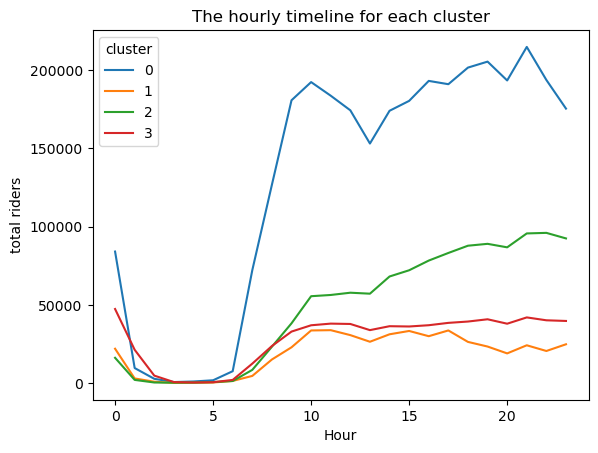

In [67]:
vehicle_hour.plot()
plt.title('The hourly timeline for each cluster')
plt.xlabel('Hour')
plt.ylabel('total riders')
plt.show()